In [50]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt




In [36]:
df = pd.read_csv('cot_pca.csv').head(15)
df.head()

,A,B,C,D,E,F
0,4.50570,3.260360,-1.249400,8.898070,8.059550,-0.842803
1,3.50856,1.660790,-1.856680,-2.573360,-1.373700,1.196000
2,4.44701,3.411940,-1.040870,10.271195,10.517256,0.272272
3,2.16003,3.146520,0.982809,9.024300,6.058320,-2.967420
4,2.35701,0.452589,-1.910680,12.984239,10.019605,-2.939020


In [37]:
#rendre la matrice centrée
X_scaled = StandardScaler().fit_transform(df)
X_scaled[:5]

array([[ 1.42819222,  0.56929361, -0.87905584,  0.92519507,  1.01139943,
        -0.17148812],
       [ 0.9065634 , -0.13588549, -1.25129116, -1.54425819, -1.42318565,
         0.71764616],
       [ 1.39749001,  0.63611848, -0.75123633,  1.22078741,  1.64569772,
         0.31480281],
       [ 0.2011137 ,  0.51910663,  0.48918786,  0.95236858,  0.49491097,
        -1.09804639],
       [ 0.30415886, -0.66852745, -1.28439073,  1.80482407,  1.51726111,
        -1.08566098]])

In [38]:
#calcule de la matrice des cov
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.07142857,  0.75387293, -0.2127804 ,  0.11212841,  0.08143182,
        -0.0866215 ],
       [ 0.75387293,  1.07142857,  0.59643271, -0.20370705, -0.23554047,
         0.01866348],
       [-0.2127804 ,  0.59643271,  1.07142857, -0.41146716, -0.4197786 ,
         0.12637371],
       [ 0.11212841, -0.20370705, -0.41146716,  1.07142857,  0.93276555,
        -0.59432347],
       [ 0.08143182, -0.23554047, -0.4197786 ,  0.93276555,  1.07142857,
        -0.07882679]])

In [39]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.63851242e+00, 1.83150713e+00, 1.08502351e+00, 8.73492981e-01,
       8.30518142e-06])

In [45]:
vectors

array([[-0.01591512, -0.68285699,  0.37942821,  0.26323957,  0.43732385,
        -0.35908223],
       [-0.33332888, -0.63864746, -0.04033882, -0.18370378, -0.51506158,
         0.42468642],
       [-0.44089055, -0.08272377, -0.49971497, -0.56115539,  0.37405215,
        -0.30699654],
       [ 0.57945508, -0.2207352 , -0.2040524 , -0.24180787, -0.45616518,
        -0.5543579 ],
       [ 0.52661251, -0.12470602,  0.18544461, -0.55998311,  0.38067451,
         0.46286478],
       [-0.28489502,  0.23391646,  0.72709345, -0.45826886, -0.22482139,
        -0.27367504]])

In [41]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), "\n", explained_variances)

1.0 
 [0.41043526464290997, 0.28490110862039997, 0.16878143519326688, 0.1358766860073315, 1.2919171105153983e-06, 4.213618981184036e-06]


In [42]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res

,PC1,PC2
0,1.292656,-1.636575
1,-1.266200,0.257462
2,1.581286,-1.699458
3,0.733397,-1.038116
4,2.938397,-0.516048
5,-1.134272,2.437746
6,-2.919479,-2.477974
7,-2.302495,0.680928
8,0.485665,1.396723
9,-0.343126,0.577054


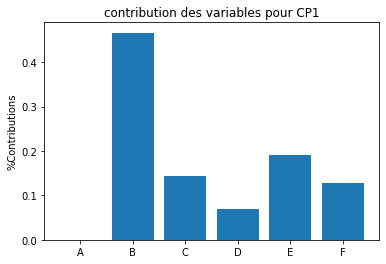

In [52]:
var_contrib_list = list()
for vect in vectors[0] :
    var_contrib_list.append(math.pow(vect, 2))
    
plt.bar(list(df), var_contrib_list , align='center')
 
plt.title('contribution des variables pour CP1')
plt.ylabel('%Contributions')
 
plt.show() 

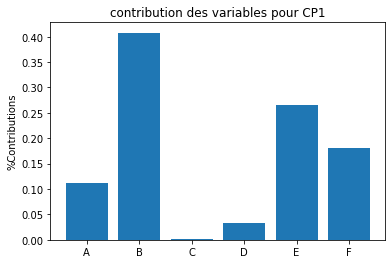

In [53]:
var_contrib_list = list()
for vect in vectors[1] :
    var_contrib_list.append(math.pow(vect, 2))
    
plt.bar(list(df), var_contrib_list , align='center')
 
plt.title('contribution des variables pour CP1')
plt.ylabel('%Contributions')
 
plt.show() 